In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv("orders.csv")
print(dataset.head())

   Order Id  Order Date       Ship Mode    Segment        Country  \
0         1  2023-03-01    Second Class   Consumer  United States   
1         2  2023-08-15    Second Class   Consumer  United States   
2         3  2023-01-10    Second Class  Corporate  United States   
3         4  2022-06-18  Standard Class   Consumer  United States   
4         5  2022-07-13  Standard Class   Consumer  United States   

              City       State  Postal Code Region         Category  \
0        Henderson    Kentucky        42420  South        Furniture   
1        Henderson    Kentucky        42420  South        Furniture   
2      Los Angeles  California        90036   West  Office Supplies   
3  Fort Lauderdale     Florida        33311  South        Furniture   
4  Fort Lauderdale     Florida        33311  South  Office Supplies   

  Sub Category       Product Id  cost price  List Price  Quantity  \
0    Bookcases  FUR-BO-10001798         240         260         2   
1       Chairs  FUR-

In [5]:
print(dataset.shape)

(9994, 16)


In [6]:
print(dataset.isnull().sum())

Order Id            0
Order Date          0
Ship Mode           1
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64


In [7]:
dataset.dropna( inplace=True)

In [8]:
print(dataset.isnull().sum())

Order Id            0
Order Date          0
Ship Mode           0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64


In [9]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9993 non-null   int64 
 1   Order Date        9993 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9993 non-null   object
 4   Country           9993 non-null   object
 5   City              9993 non-null   object
 6   State             9993 non-null   object
 7   Postal Code       9993 non-null   int64 
 8   Region            9993 non-null   object
 9   Category          9993 non-null   object
 10  Sub Category      9993 non-null   object
 11  Product Id        9993 non-null   object
 12  cost price        9993 non-null   int64 
 13  List Price        9993 non-null   int64 
 14  Quantity          9993 non-null   int64 
 15  Discount Percent  9993 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.3+ MB
None


In [33]:
# Add new column of profit:
dataset["Discount Price"]= dataset["List Price"] * (dataset["Discount Percent"]/100)
dataset["selling price"] = dataset["List Price"] - dataset["Discount Price"]
dataset["profit per product"] = dataset["selling price"] - dataset["cost price"]
dataset["profit"] = dataset["profit per product"] * dataset["Quantity"]
dataset["profit"].head()

0     29.6
1    324.3
2     -1.0
3    804.0
4     -2.0
Name: profit, dtype: float64

In [34]:

dataset.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent', 'Discount Price', 'profit per product',
       'selling price', 'profit'],
      dtype='object')

In [30]:
print(dataset["Ship Mode"].unique())

['Second Class' 'Standard Class' 'Not Available' 'unknown' 'First Class'
 'Same Day']


In [20]:
filled_value=dataset["Ship Mode"].mode()[0]
dataset["Ship Mode"]=dataset["Ship Mode"].replace("Not Available",filled_value)
dataset["Ship Mode"]=dataset["Ship Mode"].replace("unknown",filled_value)
print(dataset["Ship Mode"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [22]:
dataset.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

In [27]:
print(dataset["Sub Category"].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


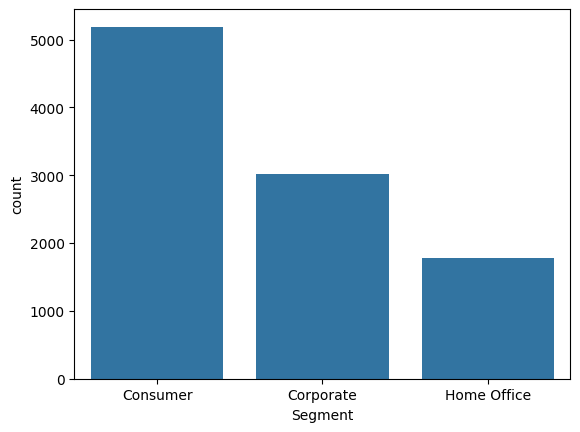

In [28]:
sns.countplot(x="Segment", data=dataset)
plt.show()  # Our main customers are consumers

In [41]:
print(dataset["State"].value_counts().head())   
#MAXIMUM ORDERS OCCUR FROM CALIFORNIA AND NEW YORK STATE

State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64


In [42]:
print(dataset["City"].value_counts().head())
# AMONG CITIES, MAXIMUM ORDERS OCCUR FROM NYC AND LA

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: count, dtype: int64


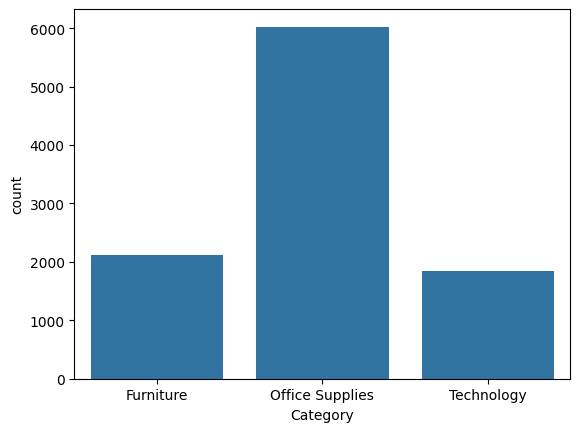

In [49]:
sns.countplot(x="Category", data=dataset)
plt.show()    # Maximum orders are from office supplies catagories.

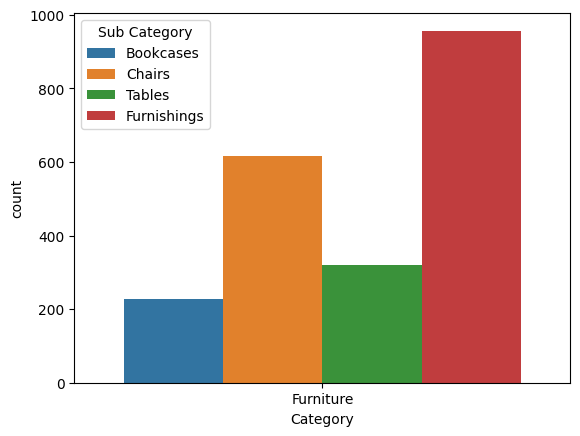

In [46]:
sns.countplot(x="Category",hue="Sub Category", data=dataset[dataset["Category"]=="Furniture"])
plt.show()    # In furnitures catagory, Furnishing have largest orders and bookcases have lowest

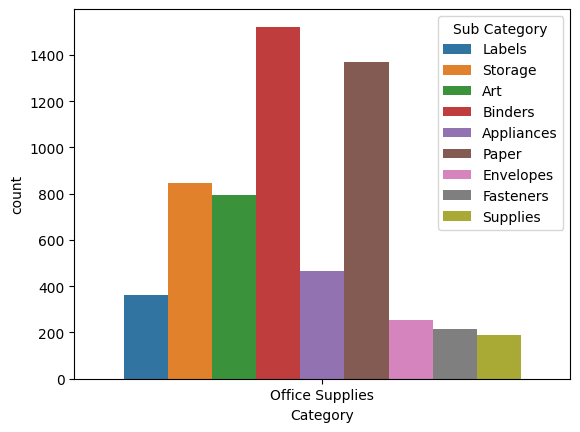

In [47]:
sns.countplot(x="Category",hue="Sub Category", data=dataset[dataset["Category"]=="Office Supplies"])
plt.show()    #in office supplies, binders sold alot

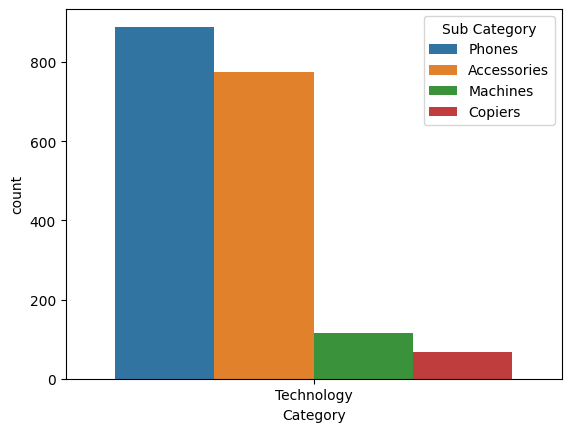

In [51]:

sns.countplot(x="Category",hue="Sub Category", data=dataset[dataset["Category"]=="Technology"])
plt.show()   # in technology, largest orders are from Phones and less from Copier sub_catagory

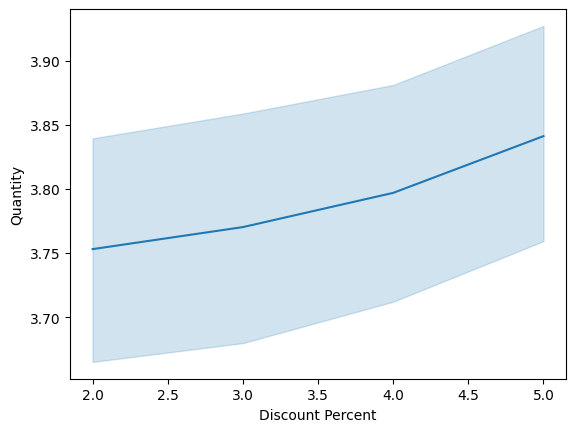

In [52]:
sns.lineplot(x="Discount Percent", y="Quantity", data=dataset)
plt.show()     # on incresing discount percentage, quantity of buying product increases

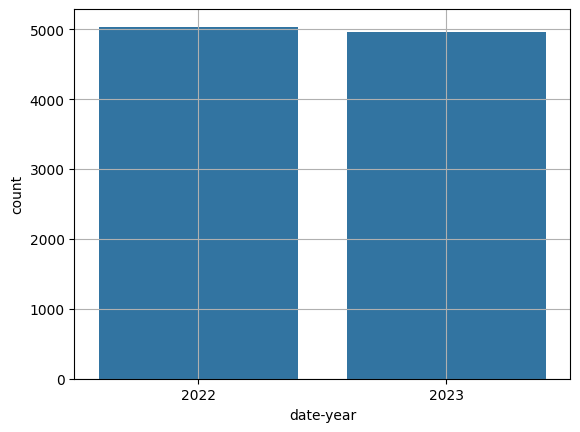

In [68]:
# to separete years from date, convert date into dt format:
dataset["Order Date"]=pd.to_datetime(dataset['Order Date'])
dataset["date-year"]=dataset["Order Date"].dt.year


bars=sns.countplot(x="date-year", data=dataset)
plt.grid()
plt.show()

# BOTH YEARS 2022, 2023 HAVE ALMOST SAME ORDERS, 2023 HAVE 5 TO 6 ORDERS LESS THAN 2022

In [60]:
furniture_data = dataset[dataset["Category"] == "Furniture"]
total_profit = furniture_data.groupby("Sub Category")["profit"].sum().reset_index()
total_profit

,Sub Category,profit
0,Bookcases,51270.8
1,Chairs,153905.7
2,Furnishings,39083.7
3,Tables,98522.2


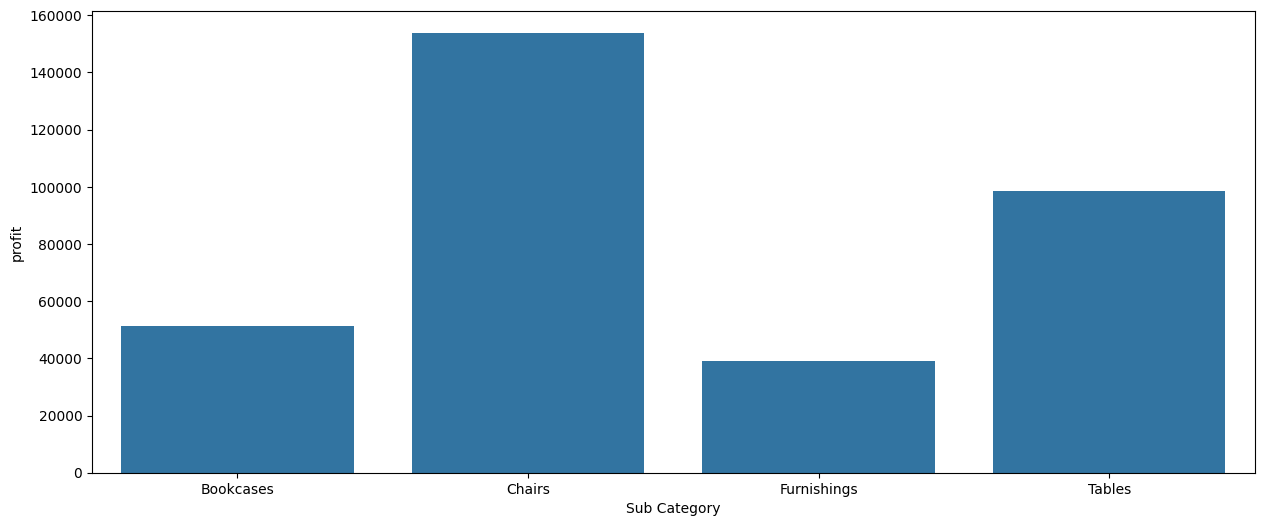

In [59]:
# for a specific catagory: subcatagory vs profit:
plt.figure(figsize=(15,6))
furniture_data = dataset[dataset["Category"] == "Furniture"]
total_profit = furniture_data.groupby("Sub Category")["profit"].sum().reset_index()
sns.barplot(x="Sub Category", y="profit", data=total_profit)
plt.show()        # Among furniture largest profit is in chairs catagory

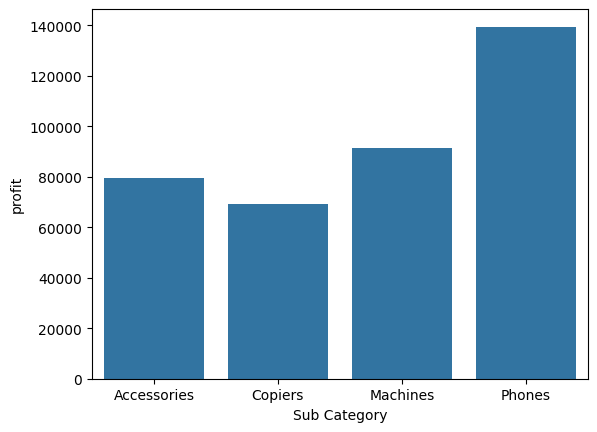

In [65]:
# for technology: profit vs sub catagory
tech=dataset[dataset["Category"]=="Technology"]
total_pr=tech.groupby("Sub Category")["profit"].sum().reset_index()
sns.barplot(x="Sub Category", y="profit", data=total_pr)
plt.show()     # phone made maximum profit.

<Axes: xlabel='Sub Category', ylabel='profit'>

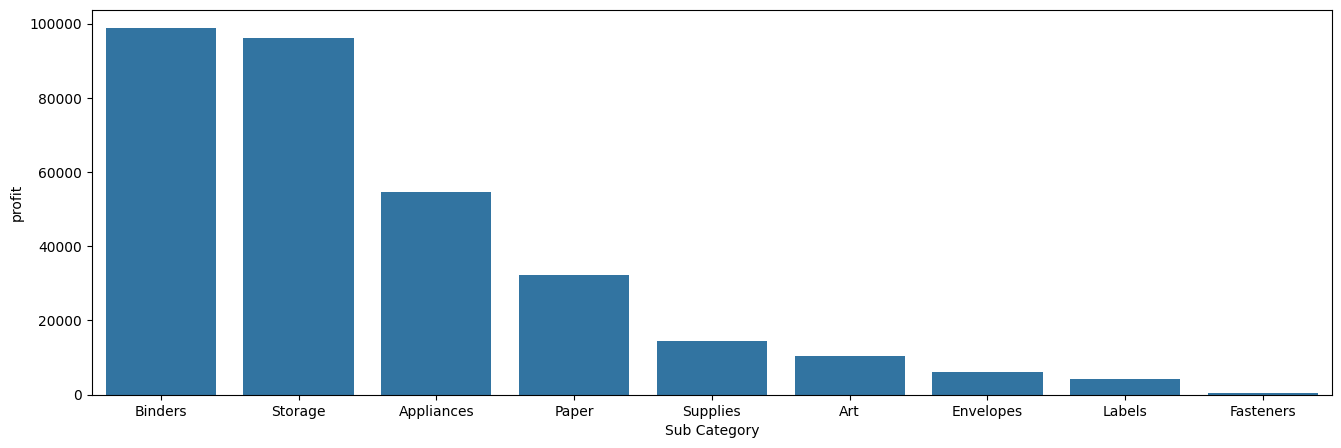

In [74]:
# for Office Supplies, profit vs sub catagory:
dat=dataset[dataset["Category"]=="Office Supplies"]
total_pro= dat.groupby("Sub Category")["profit"].sum().reset_index().sort_values(by="profit", ascending=False)
plt.figure(figsize=(16,5))
sns.barplot(x="Sub Category", y="profit", data=total_pro)
# /in office catagory: largest profit made by binders

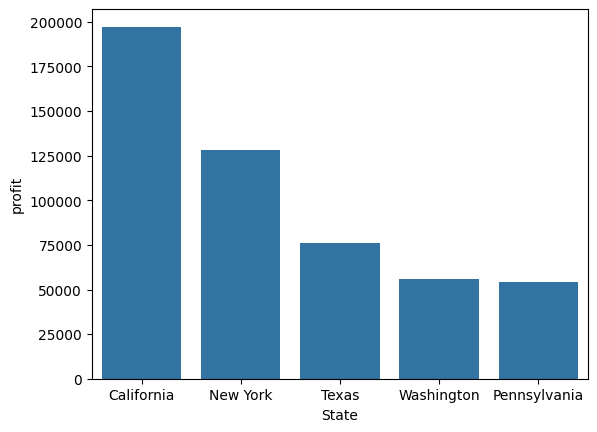

In [79]:
# state vs profit
total_profit=dataset.groupby("State")["profit"].sum().reset_index().sort_values(by="profit",ascending=False).head()
sns.barplot(x="State", y="profit", data=total_profit)
plt.show()     #largest profit made from california state

In [ ]:
# Consumers are our main custoers and they are from California state and new york city who mainly order office supply catagory as compared to furniture 
# and technology. furnishings from furniture catagory has more orders but chairs give more profit. phones and binders has more orders and gave more
# profit in technology and office supplies respectively. incresing the discount percantage increse the quantity of products to buy by customers. Moreover:
# both years have almost same number of orders.